<a href="https://colab.research.google.com/github/skywalker0803r/deep-learning-ian-goodfellow/blob/master/%E5%9B%9E%E6%B8%AC%E5%88%86%E6%9E%90%E8%99%9B%E6%93%AC%E8%B2%A8%E5%B9%A3(SMA%E7%AD%96%E7%95%A5%E5%8A%A0%E4%B8%8AMMI%E6%BF%BE%E7%B6%B2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Optimization

In [6]:
!pip install finlab_crypto > log.txt

All caught up..!


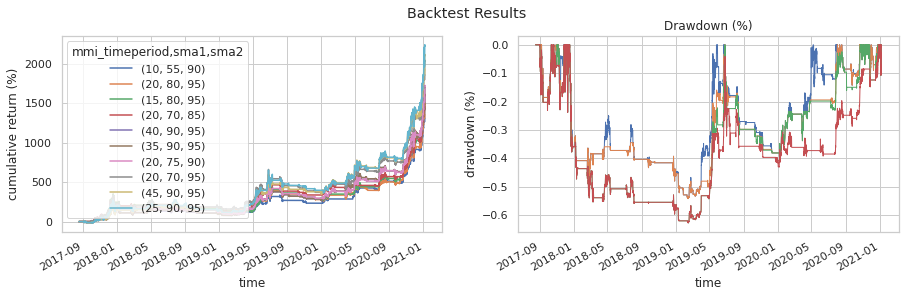

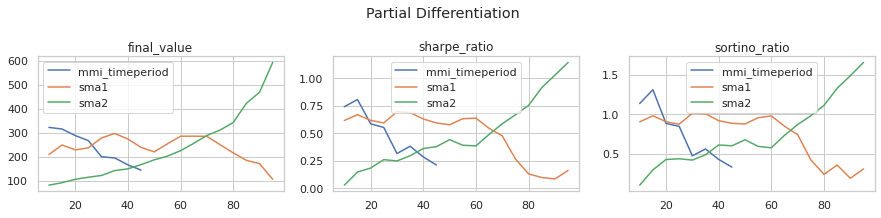

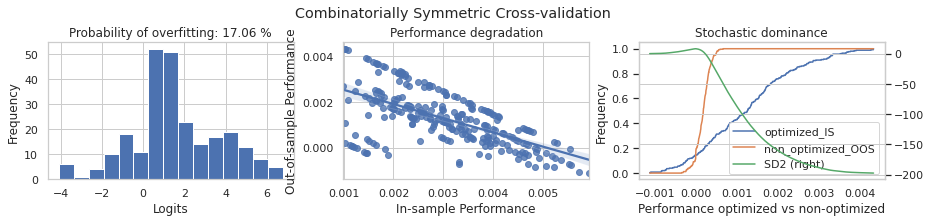

Output()

In [17]:
import numpy as np
import finlab_crypto
from finlab_crypto.strategy import Filter
from finlab_crypto import Strategy

# config
pair = 'BTCUSDT' #交易對
freq = '4h' #資料頻率

ohlcv = finlab_crypto.crawler.get_all_binance(pair,freq)

@Strategy(sma1=20, sma2=60)
def sma_strategy(ohlcv):
  close = ohlcv.close
  sma1 = close.rolling(sma_strategy.sma1).mean()
  sma2 = close.rolling(sma_strategy.sma2).mean()
  entries = (sma1 > sma2) & (sma1.shift() < sma2.shift())
  exits = (sma1 < sma2) & (sma1.shift() > sma2.shift())
  figures = {'overlaps': {'sma1': sma1,'sma1': sma2}}
  return entries, exits, figures

@Filter(timeperiod=20)
def mmi_filter(ohlcv):
  median = ohlcv.close.rolling(mmi_filter.timeperiod).median()
  p1 = ohlcv.close > median
  p2 = ohlcv.close.shift() > median
  mmi = (p1 & p2).astype(int).rolling(mmi_filter.timeperiod).mean()
  figures = {'figures': {'mmi_index': mmi}}
  return mmi > 0.5, figures

variables = {'sma1': np.arange(10, 100, 5), 'sma2': np.arange(10, 100, 5)} #均線參數
f_mmi = mmi_filter.create({'timeperiod': np.arange(10, 50, 5)}) #濾網參數

portfolio = sma_strategy.backtest(ohlcv, variables=variables, filters={'mmi': f_mmi}, freq=freq, plot=True)